<a href="https://colab.research.google.com/github/daolayaq10751/Economic-Intenational/blob/main/Copia_de_Exportaciones_claseDavid_SOFTWARE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad Surcolombiana USCO
Curso: MACROECONOMÍA II    ---  instructor:
Cristian Felipe Orjuela



*by: David Olaya*

---
![](https://drive.google.com/uc?id=1_Nmh6ALtieWoIT5utzUOT9RoxJ5hex43)




# COMERCIO INTERNACIONAL – EXPORTACIONES

Comprenden el movimiento legal de mercancías que salen del territorio aduanero nacional.

La Unidad Administrativa Especial Dirección de Impuestos y Aduanas Nacionales **DIAN**, asumió la producción de las estadísticas colombianas de comercio exterior

**Exportación**: Es la salida de mercancías del territorio
aduanero nacional con destino a otro país.
También se considera exportación, la salida de mercancías a una zona franca y a un depósito franco en los términos previstos en el Decreto 1165 del 2 de julio de 2019.[(DIAN, 2024)](https://www.dian.gov.co/dian/cifras/Documents/Ficha-Tecnica-bases-estadisticas-de-Comercio-Exterior.pdf)

La siguiente base de datos contiene el registro de las **exportaciones** de Colombia *desde 2012 hasta diciembre de 2023*. Los datos fueron extraídos de MARO, una plataforma de consulta con información actualizada de los sectores económicos.[(MARO, 2024)](https://www.maro.com.co/consulta-general/bienes/1)


CONSULTA DE EXPORTACIONES
COLOMBIA PRODUCTIVA
MAPA REGIONAL DE OPORTUNIDADES - MARO
Fuente: DANE-DIAN. Cálculos: Coordinación de inteligencia estratégica - Colombia Productiva. - Última actualización: Febrero de 2024.
**Datos actualizados a: Diciembre de 2023**
*  FOBDO: Valor exportado en dólares FOB: es el valor de los bienes exportados sin incluir los costos de transporte, seguro y otros gastos adicionales desde el puerto de origen hasta el puerto de destino, pero sí incluyendo el costo de la documentación de origen.
*  KNETO: Valor exportado en kilogramos netos.

In [4]:
# @title
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import xlrd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [5]:
url = "https://raw.githubusercontent.com/daolayaq10751/Economic-Intenational/refs/heads/main/Export_2012_2023.xlsx%20-%20Export.zip"
df = pd.read_csv(url, sep=",")
df.head()

,CIIU Rev.4,Descripción CIIU Rev.4,Destino,Departamento,FOBDO 2012,FOBDO 2013,FOBDO 2014,FOBDO 2015,FOBDO 2016,FOBDO 2017,...,KNETO 2015,KNETO 2016,KNETO 2017,KNETO 2018,KNETO 2019,KNETO 2020,KNETO 2021,KNETO 2022,KNETO ENE-DIC 2022,KNETO ENE-DIC 2023
0,142,Cría de caballos y otros equinos,Aruba,Antioquia,3000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,142,Cría de caballos y otros equinos,Estados Unidos,Antioquia,34000.0,51000.0,82400.0,631400.0,328400.0,59200.0,...,10900.0,13990.0,11080.0,10477.5,10300.0,7087.5,30040.0,15370.0,15370.0,16650.0
2,142,Cría de caballos y otros equinos,Panamá,Antioquia,0.0,0.0,0.0,3000.0,2000.0,3000.0,...,1300.0,900.0,1390.0,1350.0,0.0,1800.0,0.0,0.0,0.0,0.0
3,142,Cría de caballos y otros equinos,Perú,Antioquia,0.0,0.0,2000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142,Cría de caballos y otros equinos,Puerto Rico,Antioquia,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6900.0,7700.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.shape

(255880, 30)

In [7]:
df.columns

Index(['CIIU Rev.4', 'Descripción CIIU Rev.4', 'Destino', 'Departamento',
       'FOBDO 2012', 'FOBDO 2013', 'FOBDO 2014', 'FOBDO 2015', 'FOBDO 2016',
       'FOBDO 2017', 'FOBDO 2018', 'FOBDO 2019', 'FOBDO 2020', 'FOBDO 2021',
       'FOBDO 2022', 'FOBDO  ENE-DIC 2022', 'FOBDO  ENE-DIC 2023',
       'KNETO 2012', 'KNETO 2013', 'KNETO 2014', 'KNETO 2015', 'KNETO 2016',
       'KNETO 2017', 'KNETO 2018', 'KNETO 2019', 'KNETO 2020', 'KNETO 2021',
       'KNETO 2022', 'KNETO ENE-DIC 2022', 'KNETO ENE-DIC 2023'],
      dtype='object')

In [8]:
#Después de cargar la base (df), quí uso el método **rename**
#de la librería pandas para cambiar el nombre de algunas columnas de la base

df.rename(columns={'FOBDO  ENE-DIC 2023':'FOBDO 2023','KNETO ENE-DIC 2023':'KNETO 2023'}, inplace=True)

In [9]:
df.columns

Index(['CIIU Rev.4', 'Descripción CIIU Rev.4', 'Destino', 'Departamento',
       'FOBDO 2012', 'FOBDO 2013', 'FOBDO 2014', 'FOBDO 2015', 'FOBDO 2016',
       'FOBDO 2017', 'FOBDO 2018', 'FOBDO 2019', 'FOBDO 2020', 'FOBDO 2021',
       'FOBDO 2022', 'FOBDO  ENE-DIC 2022', 'FOBDO 2023', 'KNETO 2012',
       'KNETO 2013', 'KNETO 2014', 'KNETO 2015', 'KNETO 2016', 'KNETO 2017',
       'KNETO 2018', 'KNETO 2019', 'KNETO 2020', 'KNETO 2021', 'KNETO 2022',
       'KNETO ENE-DIC 2022', 'KNETO 2023'],
      dtype='object')

In [10]:
#Aquí escojo las variables que me intersa analizar, armando mi nueva base(df1)

df1= df[['Descripción CIIU Rev.4', 'Destino', 'Departamento',
       'FOBDO 2012', 'FOBDO 2013', 'FOBDO 2014', 'FOBDO 2015', 'FOBDO 2016',
       'FOBDO 2017', 'FOBDO 2018', 'FOBDO 2019', 'FOBDO 2020', 'FOBDO 2021',
       'FOBDO 2022', 'FOBDO 2023']]

In [11]:
df1.columns

Index(['Descripción CIIU Rev.4', 'Destino', 'Departamento', 'FOBDO 2012',
       'FOBDO 2013', 'FOBDO 2014', 'FOBDO 2015', 'FOBDO 2016', 'FOBDO 2017',
       'FOBDO 2018', 'FOBDO 2019', 'FOBDO 2020', 'FOBDO 2021', 'FOBDO 2022',
       'FOBDO 2023'],
      dtype='object')

In [12]:
paises = ['China', 'Estados Unidos', 'Panamá', 'Ecuador', 'España']
productos_por_pais = {}

for pais in paises:
    df_pais = df1[df1['Destino'] == pais]
    productos_por_pais[pais] = df_pais.groupby('Descripción CIIU Rev.4').value_counts()

for pais, df_agrupado in productos_por_pais.items():
    print(f"Productos para {pais}:")
    print(df_agrupado)

Productos para China:
Descripción CIIU Rev.4     Destino  Departamento     FOBDO 2012  FOBDO 2013  FOBDO 2014  FOBDO 2015  FOBDO 2016  FOBDO 2017  FOBDO 2018  FOBDO 2019  FOBDO 2020  FOBDO 2021  FOBDO 2022  FOBDO 2023
Actividades de impresión   China    Antioquia        0.00        0.00        0.00        15.00       0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00          1
                                    Bogotá, D.C.     0.00        0.00        184.00      0.00        0.00        0.00        2.00        0.00        0.00        0.00        0.00        0.00          1
                                    Valle del Cauca  0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        0.00        152.00      0.00          1
Acuicultura de agua dulce  China    Antioquia        0.00        0.00        0.00        0.00        0.00        0.00        0.00        1851.00     0.00        0.00        0.00  

In [13]:
# Agrupación por Descripción CIIU Rev.4 y suma de los valores FOBDO
pd.options.display.float_format = '{:,.2f}'.format
result = df1.loc[:, 'FOBDO 2012':'FOBDO 2023'].sum()
result

,0
FOBDO 2012,"60,125,165,917.93"
FOBDO 2013,"58,826,371,008.58"
FOBDO 2014,"54,856,754,566.61"
FOBDO 2015,"36,017,521,665.43"
FOBDO 2016,"31,768,340,981.28"
FOBDO 2017,"38,021,860,310.39"
FOBDO 2018,"41,904,777,398.16"
FOBDO 2019,"39,489,167,863.76"
FOBDO 2020,"31,055,810,659.69"
FOBDO 2021,"41,389,989,070.75"


In [14]:
df2 = pd.DataFrame({'Top Exportaciones del año': df1.loc[:, 'FOBDO 2012':'FOBDO 2021'].sum()}).reset_index()
df2

,index,Top Exportaciones del año
0,FOBDO 2012,"60,125,165,917.93"
1,FOBDO 2013,"58,826,371,008.58"
2,FOBDO 2014,"54,856,754,566.61"
3,FOBDO 2015,"36,017,521,665.43"
4,FOBDO 2016,"31,768,340,981.28"
5,FOBDO 2017,"38,021,860,310.39"
6,FOBDO 2018,"41,904,777,398.16"
7,FOBDO 2019,"39,489,167,863.76"
8,FOBDO 2020,"31,055,810,659.69"
9,FOBDO 2021,"41,389,989,070.75"


In [15]:
df2['Top Exportaciones del año'].sum()

np.float64(433455759442.58)

In [16]:
dfs = df1['Descripción CIIU Rev.4'].value_counts().reset_index()
dfs.columns = [['Descripción CIIU Rev.4', 'Frecuencias']]
print(dfs)

                                Descripción CIIU Rev.4 Frecuencias
0    Confección de prendas de vestir, excepto prend...       22495
1    Fabricación de sustancias y productos químicos...       10319
2    Fabricación de otros productos elaborados de m...        9133
3    Fabricación de artículos de cuchillería, herra...        6804
4          Fabricación de artículos de plástico n.c.p.        6329
..                                                 ...         ...
194       Evacuación y tratamiento de aguas residuales           4
195                    Generación de energía eléctrica           3
196                             Cría de ganado porcino           1
197  Elaboración de aceites y grasas de origen vege...           1
198              Recolección de desechos no peligrosos           1

[199 rows x 2 columns]


In [17]:
result1 = df1.loc[:, 'FOBDO 2012':'FOBDO 2021'].groupby(df1['Descripción CIIU Rev.4']).sum().sum(axis=1).sort_values(ascending=False)
print(result1)

Descripción CIIU Rev.4
Extracción de petróleo crudo                                  158,116,877,491.57
Extracción de hulla (carbón de piedra)                         54,829,877,771.33
Fabricación de productos de la refinación del petróleo         27,099,286,733.39
Trilla de café                                                 23,724,274,436.85
Industrias básicas de metales preciosos                        21,377,280,699.59
                                                                     ...        
Extracción de minerales de níquel                                         758.19
Evacuación y tratamiento de aguas residuales                              180.00
Recolección de desechos no peligrosos                                       1.00
Extracción de aceites de origen vegetal crudos                              0.00
Elaboración de aceites y grasas de origen vegetal refinados                 0.00
Length: 199, dtype: float64


In [50]:
#probando
result1.iloc[0]

np.float64(158116877491.57)

In [19]:
top_productos = result1.head(5).reset_index()
top_productos.columns = ['Producto', 'Suma']

# Asignar los nombres específicos a los productos
top_productos['Producto'] = ['Prodc. 0610', 'Prodc. 0510', 'Prodc. 2421', 'Prodc. 1061', 'Prodc. 1921']

top_productos


,Producto,Suma
0,Prodc. 0610,"158,116,877,491.57"
1,Prodc. 0510,"54,829,877,771.33"
2,Prodc. 2421,"27,099,286,733.39"
3,Prodc. 1061,"23,724,274,436.85"
4,Prodc. 1921,"21,377,280,699.59"


# Índice de Ventaja Comparativa Revelada (IVCR)

Es una medida que permite conocer la competitividad de los productos exportados por un país en el mercado mundial. El índice IVCR compara la proporción de la exportación de un sector dado en un país, con la proporción de la exportación de ese sector en el mercado mundial. Así, podemos identificar las ventajas o desventajas comparativas de cada sector.[Scott & Vollrath, 1992](https://ideas.repec.org/p/ags/uerssb/154792.html)

Para calcular el IVCR, necesitamos los datos de participación de los productos que se exportan en Colombia y los del mundo.  

En este caso, ya tenemos el TOP 3 de todos los productos que más aportan en dólares FOB al país por sus exportaciones, según la tabla "sums2". Ahora, solo nos faltan los datos de participación de esos mismos productos a nivel mundial. MARO nos proporciona esos datos mundiales, los cuales se muestran en la siguiente tabla:

In [20]:
url = "https://raw.githubusercontent.com/daolayaq10751/Economic-Intenational/refs/heads/main/Exportaciones_Mundial.xlsx%20-%20Hoja1.csv"
dfm = pd.read_csv(url, sep=",")
dfm.head()

,Top Exportaciones del año,Total Exportación Mundial,Export. Mundial Prodc. 0610,Export. Mundial Prodc. 0510,Export. Mundial Prodc. 2421,Export. Mundial Prodc. 1061,Export. Mundial Prodc. 1921
0,FOBDO 2012,"14,736,023,389.00","1,036,364,822.00","123,144,312.00","399,835,336.00","19,527,692.00","856,978,301.00"
1,FOBDO 2013,"16,404,040,875.00","1,195,066,834.00","109,239,523.00","499,038,404.00","15,431,800.00","1,017,853,319.00"
2,FOBDO 2014,"16,523,754,875.00","1,131,795,932.00","94,748,618.00","320,900,268.00","19,382,910.00","986,959,597.00"
3,FOBDO 2015,"14,457,468,581.00","636,961,184.00","73,396,170.00","313,780,176.00","18,496,285.00","640,704,395.00"
4,FOBDO 2016,"14,022,319,795.00","547,129,195.00","71,883,099.00","330,830,788.00","18,160,973.00","540,177,244.00"


In [21]:
dfm.shape

(10, 7)

In [22]:
#Como los valores de la tabla viene en (Miles de USD), entonces,
#se multiploca por 10^3 para obtener su valor a las dimensiones de la base df
#ya que la tabla (sums2) está en valores completos

dfm1 = dfm.iloc[:, 1:].replace({",": ""}, regex=True).astype(float)
dfm1 = dfm1 * 10**3
dfm1

,Total Exportación Mundial,Export. Mundial Prodc. 0610,Export. Mundial Prodc. 0510,Export. Mundial Prodc. 2421,Export. Mundial Prodc. 1061,Export. Mundial Prodc. 1921
0,"14,736,023,389,000.00","1,036,364,822,000.00","123,144,312,000.00","399,835,336,000.00","19,527,692,000.00","856,978,301,000.00"
1,"16,404,040,875,000.00","1,195,066,834,000.00","109,239,523,000.00","499,038,404,000.00","15,431,800,000.00","1,017,853,319,000.00"
2,"16,523,754,875,000.00","1,131,795,932,000.00","94,748,618,000.00","320,900,268,000.00","19,382,910,000.00","986,959,597,000.00"
3,"14,457,468,581,000.00","636,961,184,000.00","73,396,170,000.00","313,780,176,000.00","18,496,285,000.00","640,704,395,000.00"
4,"14,022,319,795,000.00","547,129,195,000.00","71,883,099,000.00","330,830,788,000.00","18,160,973,000.00","540,177,244,000.00"
5,"15,970,196,280,000.00","577,110,543,000.00","110,061,464,000.00","363,184,013,000.00","19,322,782,000.00","660,340,706,000.00"
6,"17,426,846,181,000.00","784,211,072,000.00","126,128,732,000.00","350,601,002,000.00","17,118,413,000.00","808,416,759,000.00"
7,"17,081,615,065,000.00","767,207,318,000.00","112,629,437,000.00","369,807,564,000.00","16,853,749,000.00","781,964,585,000.00"
8,"15,997,522,231,000.00","510,698,068,000.00","79,785,792,000.00","486,368,640,000.00","17,147,468,000.00","519,842,865,000.00"
9,"20,231,273,582,000.00","792,062,690,000.00","125,212,372,000.00","528,233,751,000.00","19,915,419,000.00","936,052,212,000.00"


In [23]:
dfm1.columns


Index(['Total Exportación Mundial', 'Export. Mundial Prodc. 0610',
       'Export. Mundial Prodc. 0510', 'Export. Mundial Prodc. 2421',
       'Export. Mundial Prodc. 1061', 'Export. Mundial Prodc. 1921'],
      dtype='object')

In [24]:
columnas= dfm1.columns
dfm1= dfm1[columnas].sum()
dfm1

,0
Total Exportación Mundial,"162,851,060,854,000.00"
Export. Mundial Prodc. 0610,"7,978,607,658,000.00"
Export. Mundial Prodc. 0510,"1,026,229,519,000.00"
Export. Mundial Prodc. 2421,"3,962,579,942,000.00"
Export. Mundial Prodc. 1061,"181,357,491,000.00"
Export. Mundial Prodc. 1921,"7,749,289,983,000.00"


In [25]:
#!pip install ydata-profiling

In [26]:
#import seaborn as sns
#import numpy as np
#import pandas as pd
#from ydata_profiling import ProfileReport

#reporte_Export=ProfileReport(df1, title='Reporte Exportaciones')
#reporte_Export.to_file('df1.html')

#from IPython.display import IFrame
#IFrame(src="df1.html", width=1000, height=600)
#from google.colab import files
#files.download("df1.html")

Fórmula:
\begin{equation} IVCR_{i,j} = \frac{\frac{X_{i,j}}{X_i}}{\frac{X_{w,j}}{X_w}} \end{equation}

Donde,

$$
X_{i,j}:\text{Valor exportaciones del país i del producto j} \\
X_{i}:\text{Valor exportaciones totales del país i} \\
X_{w,j}:\text{Valor exportaciones mundiales del producto j} \\
X_{w}:\text{Valor exportaciones totales mundiales } \\
$$



**Nota:**

En el TOP 3, los primeros puestos son los mismos productos, 0610: Extracción de petróleo crudo, para el puesto uno y 0510: Extracción de hulla (carbón de piedra), para el puesto dos.

Pero, para el puesto tres, protagonizan los productos
*   1921: Fabricación de productos de la refinación del petróleo
*   1061: Trilla de café
*   2421: Industrias básicas de metales preciosos

Entonces para calcular su **IVCR**, debe ser filtrado según sea el producto, por tanto se plantea esta función:

In [42]:
X_ij = result1.iloc[0]
X_i  = df2['Top Exportaciones del año'].sum()
X_wj = dfm1.iloc[1]
X_w  = dfm1.iloc[0]

In [43]:
#probamos las variables que creamos
ICVR_Prodc_0610=(X_ij/X_i)/(X_wj/X_w)
ICVR_Prodc_0610

np.float64(7.445552561790577)

In [44]:
X_ij = result1.iloc[1]
X_i  = df2['Top Exportaciones del año'].sum()
X_wj = dfm1.iloc[2]
X_w  = dfm1.iloc[0]

ICVR_Prodc_0510 = (X_ij / X_i) / (X_wj / X_w)
ICVR_Prodc_0510

np.float64(20.073291393569693)

In [45]:
X_ij=result1.iloc[2]
X_i=df2['Top Exportaciones del año'].sum()
X_wj=dfm1.iloc[3]
X_w=dfm1.iloc[0]

ICVR_Prodc_1921=(X_ij/X_i)/(X_wj/X_w)
ICVR_Prodc_1921

np.float64(2.569364015337082)

In [46]:
X_ij=result1.iloc[3]
X_i==df2['Top Exportaciones del año'].sum()
X_wj=dfm1.iloc[4]
X_w=dfm1.iloc[0]

ICVR_Prodc_1061=(X_ij/X_i)/(X_wj/X_w)
ICVR_Prodc_1061

np.float64(49.14770631096826)

In [47]:
X_ij=result1.iloc[4]
X_i==df2['Top Exportaciones del año'].sum()
X_wj=dfm1.iloc[5]
X_w=dfm1.iloc[0]

ICVR_Prodc_2421=(X_ij/X_i)/(X_wj/X_w)
ICVR_Prodc_2421

np.float64(1.036421375018692)

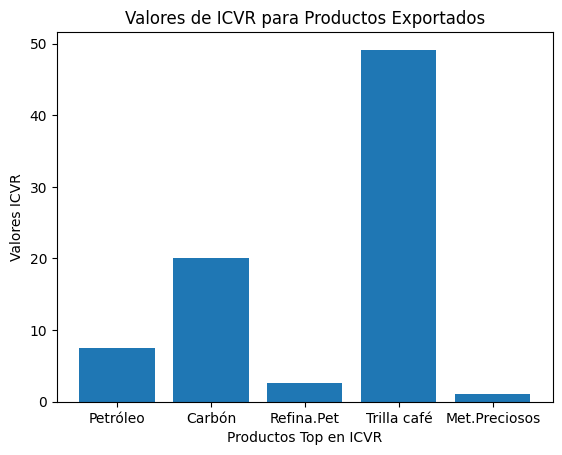

In [61]:
import matplotlib.pyplot as plt

x = ['Petróleo', 'Carbón','Refina.Pet', 'Trilla café', 'Met.Preciosos']
y = [ICVR_Prodc_0610, ICVR_Prodc_0510, ICVR_Prodc_1921, ICVR_Prodc_1061, ICVR_Prodc_2421]

plt.xlabel('Productos Top en ICVR')
plt.ylabel('Valores ICVR')
plt.title('Valores de ICVR para Productos Exportados')

plt.bar(x, y)
plt.show()

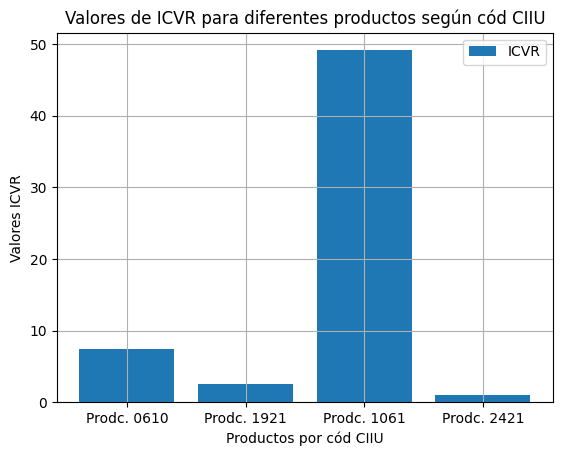

In [62]:
x = ['Prodc. 0610', 'Prodc. 1921', 'Prodc. 1061', 'Prodc. 2421']
y = [ICVR_Prodc_0610, ICVR_Prodc_1921, ICVR_Prodc_1061, ICVR_Prodc_2421]

# Crear una gráfica de barras
plt.bar(x, y, label="ICVR")
plt.xlabel('Productos por cód CIIU')
plt.ylabel('Valores ICVR')
plt.title('Valores de ICVR para diferentes productos según cód CIIU')
plt.legend()
plt.grid(True)
plt.show()


# RESULTADOS IVCR
De los productos TOP 3 que más han aportado en las Exportaciones de Colombia, tenemos que:

*   **Extracción de petróleo crudo:** El país ha exportado este producto con una intensidad 7.44 veces mayor que el promedio mundial entre 2012 y 2021, lo que indica una moderada ventaja comparativa en este sector.
*   **Extracción de hulla (carbón de piedra):
*   **Fabricación de productos de la refinación del petróleo:**
*  **Trilla de café:**
*   **Industrias básicas de metales preciosos:**






